# Decision Tree  
## How the Algorithm Works

**The process begins with all examples placed at the root node. Then:**

- **For each available feature, we calculate the information gain and select the one with the highest value.**  
- **We split the dataset based on the selected feature.**  
- **This process repeats recursively until a stopping condition is met.**

---

## Key Concepts

### Entropy  

**Entropy is a measure of impurity or disorder in a dataset.**  

Entropy formula:
$$
H = -\sum p_i \log_2 p_i
$$

Where:
- $p_i$ — the proportion of examples belonging to class $i$ in the node.

---

### Information Gain

**Information gain measures the reduction in entropy after a dataset is split.**  
**We aim to choose the split that results in the highest information gain.**

Formula:
$$
\text{Information Gain} = H(\text{parent}) - \left( w_\text{left} \cdot H(\text{left}) + w_\text{right} \cdot H(\text{right}) \right)
$$

Where:
- $H(\text{parent})$ — entropy of the node before the split  
- $H(\text{left})$, $H(\text{right})$ — entropies of the left and right branches  
- $w_\text{left}$, $w_\text{right}$ — proportions of examples in the left and right branches


In [1]:
import pandas as pd
from pathlib import Path
import sys
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df = pd.read_csv("../data/breast-cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.drop('id', axis=1, inplace=True) 

C:\Users\szymwid\AppData\Local\Temp\ipykernel_8356\1581478900.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [class_counts[0], class_counts[1]]


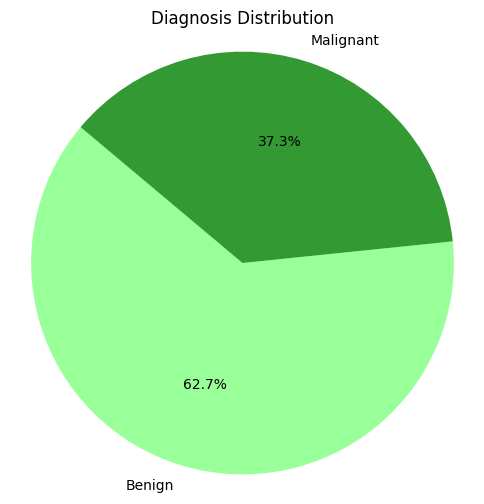

In [4]:
class_counts = df['diagnosis'].value_counts()
labels = ['Benign', 'Malignant']
sizes = [class_counts[0], class_counts[1]]
colors = ['#99ff99','#339933']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Diagnosis Distribution')
plt.axis('equal')
plt.show()


## From this plot we conclude that:
* **Data isn't balanced, accuracy wont be a good evaluation metric for this dataset**

C:\Users\szymwid\AppData\Local\Temp\ipykernel_8356\266435807.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, ax=axes[i], palette="Set2")
C:\Users\szymwid\AppData\Local\Temp\ipykernel_8356\266435807.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, ax=axes[i], palette="Set2")
C:\Users\szymwid\AppData\Local\Temp\ipykernel_8356\266435807.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, ax=axes[i], palette="Set2")
C:\Users\szymwid\AppData\Local\

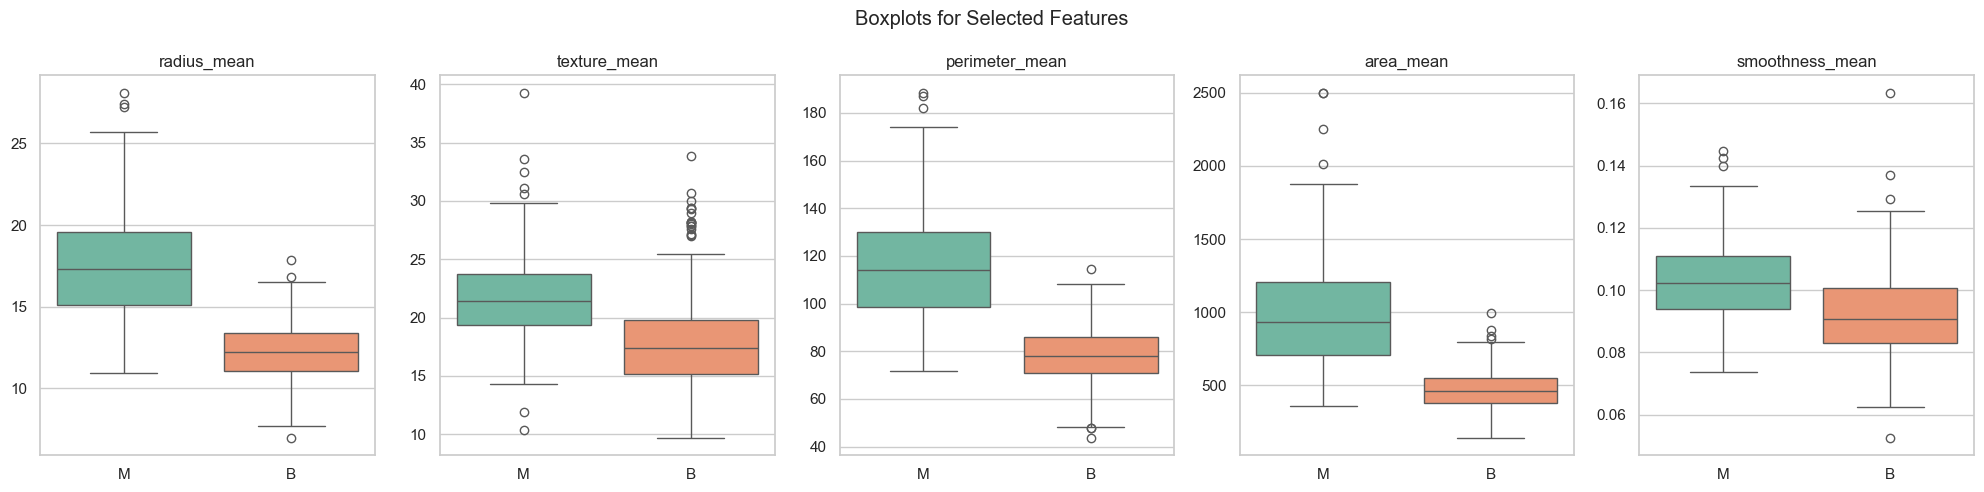

In [5]:
sns.set(style="whitegrid")
features = df.columns[1:6]  
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, col in enumerate(features):
    sns.boxplot(x='diagnosis', y=col, data=df, ax=axes[i], palette="Set2")
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

fig.suptitle("Boxplots for Selected Features")
plt.tight_layout()
plt.show()


In [6]:
for column in  df.drop('diagnosis',axis=1).columns[5:10]:
    fig = px.scatter(data_frame=df,color='diagnosis',x=column,color_discrete_sequence=['#007500','#5CFF5C'],)
    fig.show()

<a id="4"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '

# Data Preprocessing

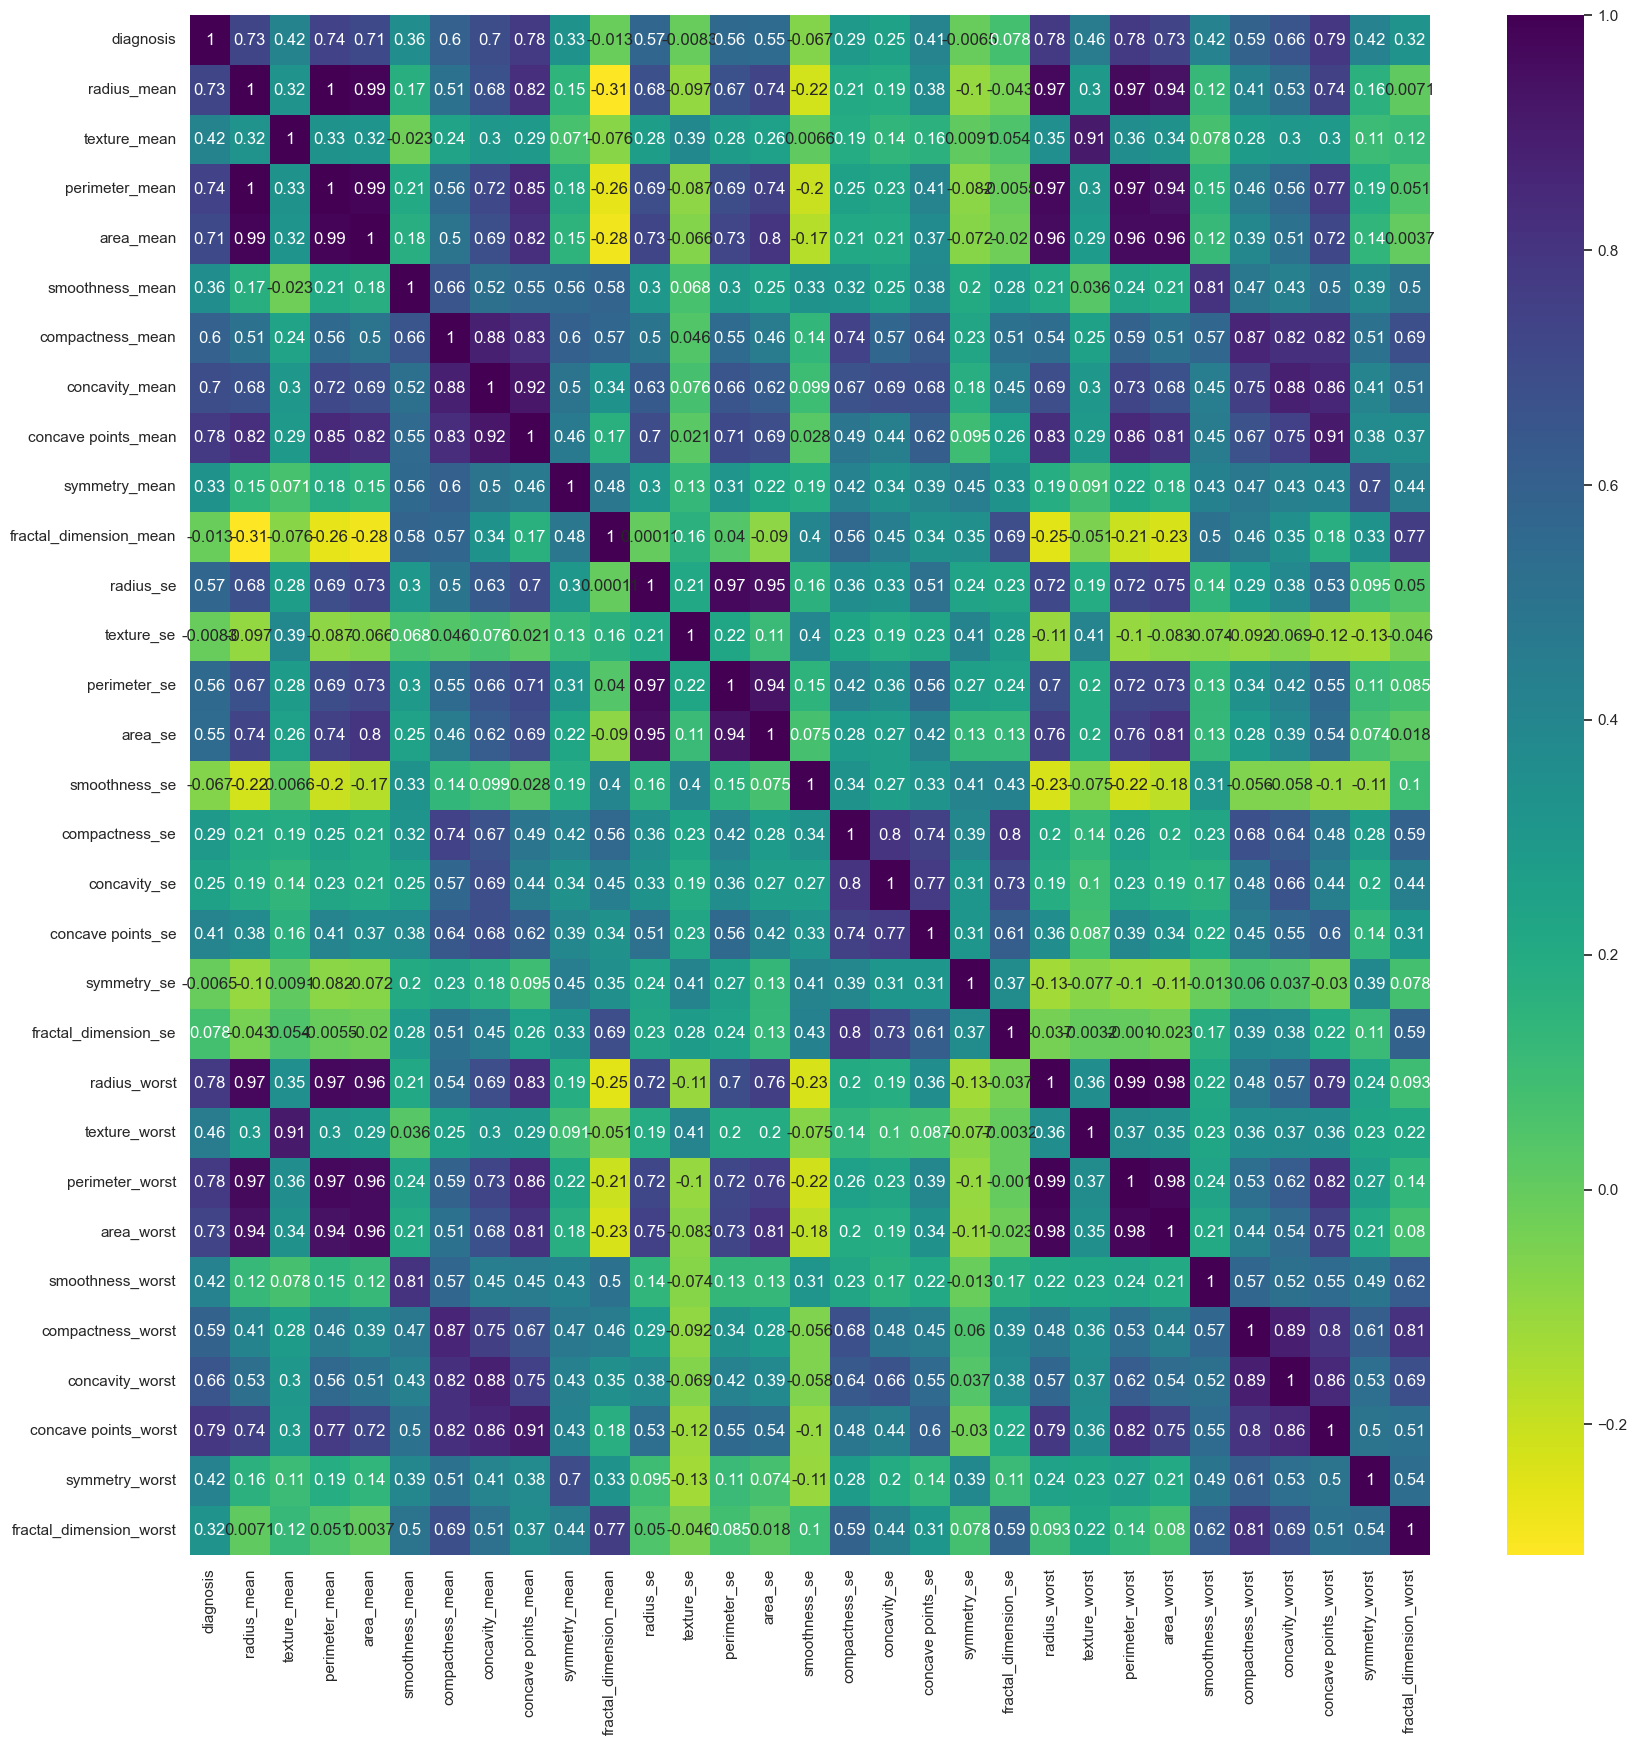

In [7]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='viridis_r',annot=True)
plt.show()

## From this plot we conclude that:
* **Some features aren't correlated with the target maybe we should remove them**

In [8]:
notincluded_columns = abs(corr['diagnosis'])[abs(corr['diagnosis'] < 0.25)]
notincluded_columns = notincluded_columns.index.tolist()
for col in notincluded_columns:
  df.drop(col, axis = 1, inplace = True)

In [9]:
print(notincluded_columns)

['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']


In [10]:
X = df.drop('diagnosis', axis = 1).values
y = df['diagnosis']
print('Shape of X', X.shape)
print('Shape of y', y.shape)

Shape of X (569, 25)
Shape of y (569,)


In [ ]:
from mlfs.preprocessing import  train_test_split, standardize
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train, mean, std = standardize(X_train, return_params=True)
X_test = (X_test - mean) / std

<a id="4"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '

# Comparing

In [12]:
from mlfs.decision_tree import DecisionTree as CustomDecisionTree
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTree

def benchmark_decision_tree_custom_vs_sklearn(X, y, n_repeats=5):
    """
    Benchmarks training and prediction times for custom and sklearn decision tree implementations.

    Parameters
    ----------
    X : np.ndarray or pd.DataFrame
        Feature matrix.
    y : np.ndarray or pd.Series
        Target vector.
    n_repeats : int
        Number of times to repeat the measurement (for averaging).

    Returns
    -------
    pd.DataFrame
        DataFrame with average fit and predict times for both models.
    """
    import time
    import numpy as np
    import pandas as pd

    custom_fit_times = []
    custom_predict_times = []
    sklearn_fit_times = []
    sklearn_predict_times = []

    for _ in range(n_repeats):
        custom_model = CustomDecisionTree(min_samples=2, max_depth=5)

        start = time.time()
        custom_model.fit(X, y)
        custom_fit_times.append(time.time() - start)

        start = time.time()
        custom_model.predict(X)
        custom_predict_times.append(time.time() - start)

        sklearn_model = SklearnDecisionTree(max_depth=5)

        start = time.time()
        sklearn_model.fit(X, y)
        sklearn_fit_times.append(time.time() - start)

        start = time.time()
        sklearn_model.predict(X)
        sklearn_predict_times.append(time.time() - start)

    results = pd.DataFrame({
        'Model': ['CustomDecisionTree', 'SklearnDecisionTree'],
        'FitTime': [np.mean(custom_fit_times), np.mean(sklearn_fit_times)],
        'PredictTime': [np.mean(custom_predict_times), np.mean(sklearn_predict_times)]
    })

    return results


In [13]:
df_results = benchmark_decision_tree_custom_vs_sklearn(X_train, y_train)
display(df_results)

,Model,FitTime,PredictTime
0,CustomDecisionTree,7.576838,0.000905
1,SklearnDecisionTree,0.007480,0.000241


### Benchmark Results: Custom vs Sklearn Decision Tree


#### Analysis

- **Training Time**: The custom implementation, written from scratch in Python, naturally incurs higher training time compared to scikit-learn’s optimized C-based backend. This trade-off is expected in educational or prototype implementations that prioritize clarity and algorithmic transparency over raw performance.

- **Prediction Time**: While also slightly higher in the custom version, the prediction step remains fast and efficient for typical dataset sizes.

#### Conclusion

This benchmark highlights the performance differences between a reference implementation and a production-grade library. The custom decision tree was developed to deepen understanding of core decision tree logic and data structures, and serves as a solid foundation for future optimization work. Despite the performance gap, the implementation demonstrates correctness and functional parity with sklearn’s API.


In [14]:
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def benchmark_varying_sample_sizes(sample_sizes, n_features=20, n_classes=2, n_repeats=3):
    all_results = []

    for n_samples in sample_sizes:
        print(f"Benchmarking for {n_samples} samples...")
        X, y = make_classification(n_samples=n_samples,
                                   n_features=n_features,
                                   n_informative=int(n_features * 0.6),
                                   n_redundant=int(n_features * 0.2),
                                   n_classes=n_classes,
                                   random_state=42)
        results = benchmark_decision_tree_custom_vs_sklearn(X, y, n_repeats=n_repeats)
        results['sample_size'] = n_samples
        all_results.append(results)

    df = pd.concat(all_results, ignore_index=True)
    return df

def plot_benchmark_results(df):
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.lineplot(data=df, x='sample_size', y='FitTime', hue='Model', marker='o')
    plt.title('Training Time vs Number of Samples')
    plt.xlabel('Number of Samples')
    plt.ylabel('Average Training Time [s]')
    plt.xscale('log')

    plt.subplot(1, 2, 2)
    sns.lineplot(data=df, x='sample_size', y='PredictTime', hue='Model', marker='o')
    plt.title('Prediction Time vs Number of Samples')
    plt.xlabel('Number of Samples')
    plt.ylabel('Average Prediction Time [s]')
    plt.xscale('log')

    plt.tight_layout()
    plt.show()

sample_sizes = [100, 500, 1000, 5000, 10000]
df_results = benchmark_varying_sample_sizes(sample_sizes, n_features=20, n_classes=2, n_repeats=3)
plot_benchmark_results(df_results)

Benchmarking for 100 samples...
Benchmarking for 500 samples...


: 

In [15]:
import pandas as pd
import numpy as np
from mlfs.decision_tree import DecisionTree as CustomDecisionTree
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTree
from mlfs.metrics import (
    accuracy as custom_accuracy,
    balanced_accuracy as custom_balanced_accuracy
)
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score
)

custom_model = CustomDecisionTree(min_samples=2, max_depth=5)
custom_model.fit(X_train, y_train)

sk_model = SklearnDecisionTree(max_depth=5)
sk_model.fit(X_train, y_train)

y_pred_custom = custom_model.predict(X_test)
y_pred_sk     = sk_model.predict(X_test)

y_true = np.array(y_test).ravel()

acc_c  = custom_accuracy(y_true, y_pred_custom)
balacc_c = custom_balanced_accuracy(y_true, y_pred_custom)

acc_s  = accuracy_score(y_true, y_pred_sk)
balacc_s = balanced_accuracy_score(y_true, y_pred_sk)

df_results = pd.DataFrame({
    'Model':            ['Custom',       'Sklearn'],
    'Accuracy':         [acc_c,          acc_s],
    'Balanced Accuracy':[balacc_c,       balacc_s]
})

display(df_results)


,Model,Accuracy,Balanced Accuracy
0,Custom,0.902655,0.930380
1,Sklearn,0.911504,0.919955
